# 1D Sod Tube

[![DownloadNotebook](https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/website-images/master/resource/_static/logo_notebook_en.png)](https://obs.dualstack.cn-north-4.myhuaweicloud.com/mindspore-website/notebook/master/mindflow/en/cfd_solver/mindspore_sod_tube.ipynb)&emsp;[![DownloadCode](https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/website-images/master/resource/_static/logo_download_code_en.png)](https://obs.dualstack.cn-north-4.myhuaweicloud.com/mindspore-website/notebook/master/mindflow/en/cfd_solver/mindspore_sod_tube.py)&emsp;[![ViewSource](https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/website-images/master/resource/_static/logo_source_en.png)](https://gitee.com/mindspore/docs/blob/master/docs/mindflow/docs/source_en/cfd_solver/sod_tube.ipynb)

## Environment Setup

This notebook requires **MindSpore version >= 2.0.0** to support new APIs including: *mindspore.jit, mindspore.jit_class, mindspore.data_sink*. Please check [MindSpore Installation](https://www.mindspore.cn/install/en) for details.

In addition, **MindFlow version >=0.1.0** is also required. If it has not been installed in your environment, please select the right version and hardware, then install it as follows.

In [ ]:
mindflow_version = "0.1.0"  # update if needed
# GPU Comment out the following code if you are using NPU.
!pip uninstall -y mindflow-gpu
!pip install mindflow-gpu==$mindflow_version

# NPU Uncomment if needed.
# !pip uninstall -y mindflow-ascend
# !pip install mindflow-ascend==$mindflow_version

## Overview

The shock tube problem is a common test for the accuracy of computational fluid codes, like Riemann solvers. The test consists of a one-dimensional Riemann problem with left and right states of an ideal gas.

## Problem Description

The definition of the Sod tube problem is:

$$
\frac{\partial}{\partial t} \left(\begin{matrix} \rho \\ \rho u \\ E \\\end{matrix} \right) + \frac{\partial}{\partial x} \left(\begin{matrix} \rho u \\ \rho u^2 + p \\ u(E + p) \\\end{matrix} \right) = 0
$$

$$
E = \frac{\rho}{\gamma - 1} + \frac{1}{2}\rho u^2
$$

where $\gamma = 1.4$ for ideal gas. The initial condition is

$$
\left(\begin{matrix} \rho \\ u \\ p \\\end{matrix}\right)_{x<0.5} = \left(\begin{matrix} 1.0 \\ 0.0 \\ 1.0 \\\end{matrix}\right), \quad
\left(\begin{matrix} \rho \\ u \\ p \\\end{matrix}\right)_{x>0.5} = \left(\begin{matrix} 0.125 \\ 0.0 \\ 0.1 \\\end{matrix}\right)
$$

The Neumann boundary condition is applied on both side of the tube.

The following `src` pacakage can be downloaded in [src](https://gitee.com/mindspore/mindscience/tree/master/MindFlow/applications/cfd/sod/src).

In [1]:
from mindspore import context
from mindflow import load_yaml_config, vis_1d
from mindflow import cfd
from mindflow.cfd.runtime import RunTime
from mindflow.cfd.simulator import Simulator

from src.ic import sod_ic_1d

## Setting up the MindSpore Runtime Environment

Before running the program, the context should be configured. The commonly used parameters inside `context.set_context` are described as follows:

`mode` represents the execution mode. 'GRAPH' indicates the static graph mode, 'PYNATIVE' indicates the dynamic graph mode. For more details, please refer to the [MindSpore official website](https://www.mindspore.cn/docs/en/r2.0/design/dynamic_graph_and_static_graph.html?highlight=pynative). The default value is 'GRAPH'.

`save_graphs` indicates whether to save the computation graph. The default value is 'False'.

`device_target` represents the type of computing platform to be used, which can be either 'Ascend' or 'GPU'. The default value is 'GPU'.

`device_id` represents the number of the computing card to be used. It can be filled in according to the actual situation. The default value is 0.

In [2]:
context.set_context(mode=context.GRAPH_MODE, save_graphs=False, device_target="GPU", device_id=0)

## Reading Configuration File

This program provides multiple options for configuring the grid, materials, simulation time, boundary conditions, and numerical methods. These configurations can be set in the file named [numeric.yaml](./numeric.yaml). Users can choose different numerical methods according to their needs. The program supports the following numerical methods: WENO3, WENO5, and WENO7 for reconstruction, and Rsuanov, HLLC, and Roe for Riemann solvers.

In addition to directly setting the configurations in the file, you can also modify the following code to select the desired numerical methods. In the code block below, the second and third lines are where the numerical methods are set. If you prefer to specify the numerical methods directly in the configuration file, you can comment out these two lines of code.

In [3]:
config = load_yaml_config('numeric.yaml')

## Define Simulator and RunTime

In [4]:
simulator = Simulator(config)
runtime = RunTime(config['runtime'], simulator.mesh_info, simulator.material)

## Initial Condition

Initial condition is determined according to mesh coordinates.

In [5]:
mesh_x, _, _ = simulator.mesh_info.mesh_xyz()
pri_var = sod_ic_1d(mesh_x)
con_var = cfd.cal_con_var(pri_var, simulator.material)

## Run Simulation

Run CFD simulation with time marching.

In [6]:
while runtime.time_loop(pri_var):
    pri_var = cfd.cal_pri_var(con_var, simulator.material)
    runtime.compute_timestep(pri_var)
    con_var = simulator.integration_step(con_var, runtime.timestep)
    runtime.advance()

current time = 0.000000, time step = 0.007606
current time = 0.007606, time step = 0.004957
current time = 0.012564, time step = 0.004426
current time = 0.016990, time step = 0.004285
current time = 0.021274, time step = 0.004200
current time = 0.025474, time step = 0.004197
current time = 0.029671, time step = 0.004117
current time = 0.033787, time step = 0.004086
current time = 0.037874, time step = 0.004124
current time = 0.041998, time step = 0.004134
current time = 0.046131, time step = 0.004123
current time = 0.050254, time step = 0.004096
current time = 0.054350, time step = 0.004096
current time = 0.058445, time step = 0.004082
current time = 0.062528, time step = 0.004082
current time = 0.066610, time step = 0.004079
current time = 0.070689, time step = 0.004071
current time = 0.074761, time step = 0.004079
current time = 0.078840, time step = 0.004079
current time = 0.082919, time step = 0.004084
current time = 0.087003, time step = 0.004088
current time = 0.091090, time step

## Post Processing

You can view the density, pressure and velocity.

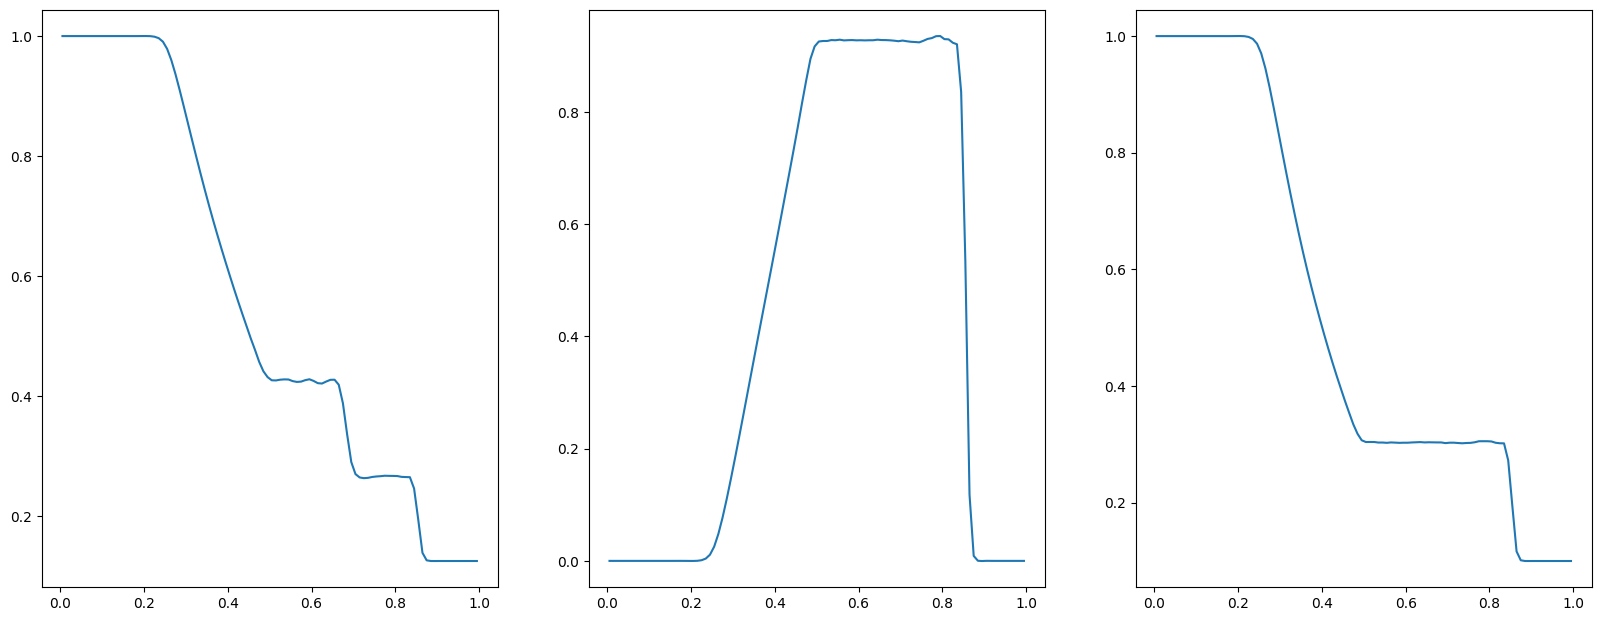

In [7]:
pri_var = cfd.cal_pri_var(con_var, simulator.material)
vis_1d(pri_var, 'sod.jpg')